In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Ice_cream_selling_data.csv')
data 

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [3]:
# check if there is any null value
data.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

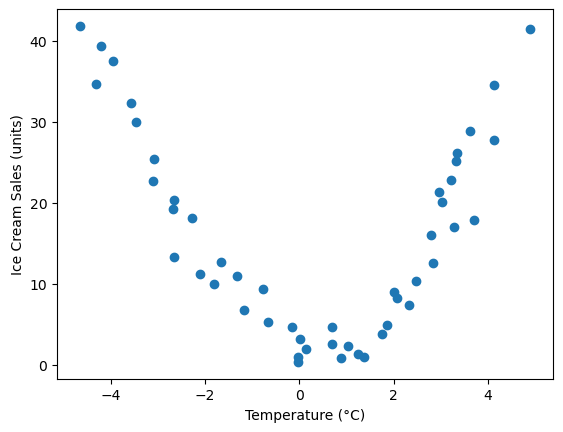

In [4]:
plt.scatter(data['Temperature (°C)'],data['Ice Cream Sales (units)'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

In [5]:
X = data[['Temperature (°C)']]
Y = data['Ice Cream Sales (units)']

In [6]:
# let's implement simple linear regression 
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0) 

In [24]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression()

In [25]:
regression.fit(X_train, Y_train)


LinearRegression()

In [26]:
from sklearn.metrics import r2_score

In [27]:
Y_pred = regression.predict(X_test)
Y_pred

array([16.18489694, 18.38519925, 16.40094884, 16.01550346, 15.89996704,
       15.52906679, 15.7577106 , 15.35993236, 18.16364801, 17.97214712])

In [28]:
score = r2_score(Y_test,Y_pred)
score

-0.02557459798788919

In [29]:
regression.predict(X_train)

array([17.81030723, 15.96624676, 15.8661985 , 16.33443861, 14.60798855,
       18.66831725, 14.95024587, 17.09095746, 17.3817368 , 16.23796274,
       16.78692992, 17.3134533 , 15.33378825, 16.80687473, 15.31328015,
       17.98148715, 17.60119761, 16.48173028, 18.33046666, 17.13532437,
       15.68938298, 17.53053746, 15.47195947, 18.71401967, 17.73171427,
       15.30443153, 16.48387694, 18.17573889, 16.72426879, 15.54997379,
       16.80586724, 16.85743532, 17.97249856, 15.4448065 , 15.14041244,
       18.55054713, 18.86804867, 14.94905811, 15.18197313])

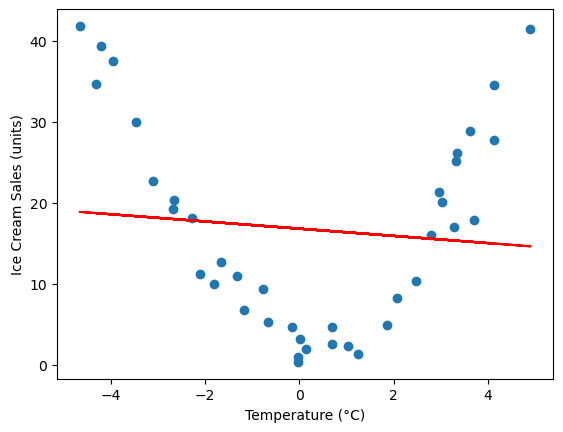

In [ ]:


plt.plot(X_train, regression.predict(X_train),color='r')
plt.scatter(X_train,Y_train)
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.show()

In [31]:
# polynomial transformation 
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_test_poly = poly.fit_transform(X_test)
X_train_poly = poly.fit_transform(X_train)

In [33]:
regression.fit(X_train_poly, Y_train)

LinearRegression()

In [34]:
Y_pred_poly = regression.predict(X_test_poly)
Y_pred_poly

array([ 5.91766273, 29.03454159,  4.3558908 ,  7.72572453,  9.25316194,
       15.76917149, 11.46162343, 19.55690953, 22.7885705 , 18.09676054])

In [35]:
score = r2_score(Y_test,Y_pred_poly)
score

0.8751729819534021

In [37]:
print(regression.coef_),print(regression.intercept_)

[ 0.         -0.74433207  1.77431524]
3.648945435966427


(None, None)

In [44]:
X_new = np.linspace(-4, 4, 100).reshape(100,1)
X_new_poly = poly.transform(X_new)
y_new = regression.predict(X_new_poly)

c:\Users\athar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


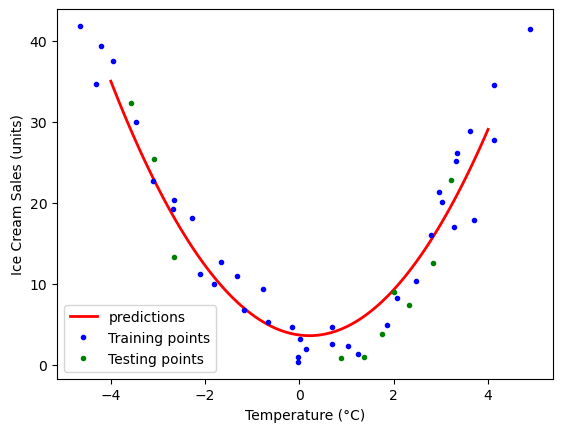

In [48]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="predictions")
plt.plot(X_train, Y_train, "b.",label="Training points")
plt.plot(X_test, Y_test, "g.",label="Testing points")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()